In [235]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio, os
import imgaug as ia
import imgaug.augmenters as iaa
from tqdm import tqdm_notebook as tqdm
import cv2

In [236]:
data_path = '..\\GAN_Workshop\\carpets_border\\'

# imgaug

In [237]:
def load_images_from_folder(path):
    images = []
    for filename in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except:
            continue
        if img is not None:
            images.append(img)
    return images

In [238]:
# load images
images = load_images_from_folder(data_path)

In [239]:
len(images)

14

1) use horizontal, vertical , and vertical-horizontal flips (thus each image creates 3 additional images)<br>
2) find useful range for Sharpen<br>
3) find noise level on additive gausian noise (for the eye it should be insdistinguishable)<br>
4) find good thresholds on Add lighness (should not be too contarstive) <br>
5) find good parameters range for AddtoHueSaturation <br>
6) find good parameter range for Multiply (it enhances channels with gievn probabilities) <br>
7) find good paremters for Linear COntrast

### filtered augumentation techniques which can be used

In [ ]:
iaa.Fliplr(0.5), # horizontally flip 50% of all images
iaa.Flipud(0.2), # vertically flip 20% of all images
iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation
iaa.Multiply((0.5, 1.5), per_channel=0.5)
iaa.LinearContrast((0.8, 1.2), per_channel=1), # improve or worsen the contrast

### testing technqiues

In [232]:
seq = iaa.Sequential(
iaa.PerspectiveTransform(scale=(0.01, 0.1))
)

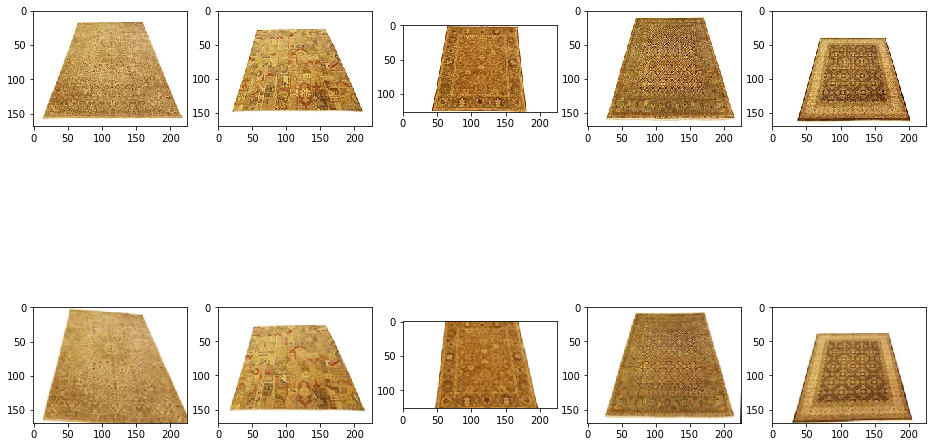

In [234]:
fig,axes = plt.subplots(2,5, figsize = (16,10))
for c,i in enumerate([np.random.randint(177) for _ in range(5)]):
    axes[0,c].imshow(images[i])
    
    img_aug = seq.augment_image(images[i])
    axes[1,c].imshow(img_aug)

### final set of technqiues

In [243]:
seq = iaa.Sequential(
    [iaa.Fliplr(0.5), # horizontally flip 50% of all images
    iaa.Flipud(0.2), # vertically flip 20% of all images
    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
    iaa.OneOf([iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation,
                iaa.Multiply((0.5, 1.5), per_channel=0.5)]),
    iaa.OneOf([iaa.LinearContrast((0.8, 1.2), per_channel=1),
               iaa.Add((-10, 10), per_channel=0.5)]), 
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
    ]
)

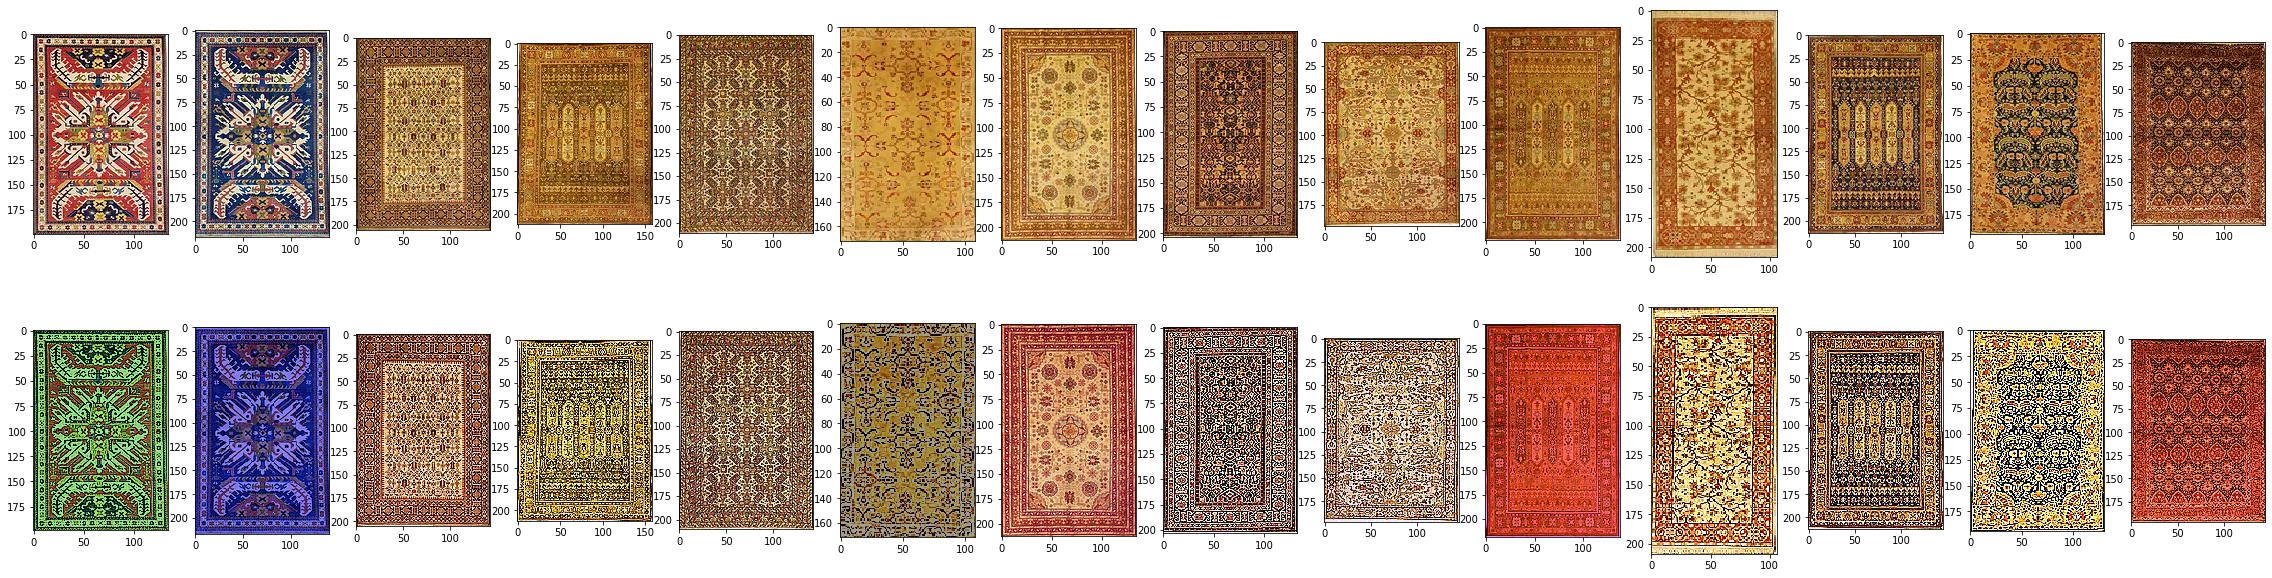

In [244]:
fig,axes = plt.subplots(2,14, figsize = (40,10))
for c,i in enumerate([j for j in range(14)]):
    axes[0,c].imshow(images[i])
    
    img_aug = seq.augment_image(images[i])
    axes[1,c].imshow(img_aug)